<a href="https://colab.research.google.com/github/Om-Tiwari/Memes-Classification-with-CNN/blob/main/CNN_meme_not_meme_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!kaggle datasets download -d vineethakkinapalli/memes-classification-dataset

 96% 212M/221M [00:01<00:00, 114MB/s] 
100% 221M/221M [00:02<00:00, 115MB/s]


In [38]:
import zipfile
zip_ref = zipfile.ZipFile("/content/memes-classification-dataset.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [40]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/memes_dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/memes_dataset/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 1293 files belonging to 2 classes.
Found 159 files belonging to 2 classes.


In [41]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [56]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    layers.Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    layers.Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    layers.Flatten(),
    layers.Dropout(rate=0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [57]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
41/41 [==============================] - 14s 245ms/step - loss: 0.7340 - accuracy: 0.6899 - val_loss: 0.4598 - val_accuracy: 0.8050
Epoch 2/10
41/41 [==============================] - 13s 276ms/step - loss: 0.3542 - accuracy: 0.8616 - val_loss: 0.4159 - val_accuracy: 0.8365
Epoch 3/10
41/41 [==============================] - 13s 269ms/step - loss: 0.2174 - accuracy: 0.9188 - val_loss: 0.2550 - val_accuracy: 0.9182
Epoch 4/10
41/41 [==============================] - 13s 277ms/step - loss: 0.1093 - accuracy: 0.9652 - val_loss: 0.1327 - val_accuracy: 0.9497
Epoch 5/10
41/41 [==============================] - 13s 260ms/step - loss: 0.0681 - accuracy: 0.9760 - val_loss: 0.1238 - val_accuracy: 0.9623
Epoch 6/10
41/41 [==============================] - 13s 276ms/step - loss: 0.0234 - accuracy: 0.9899 - val_loss: 0.1225 - val_accuracy: 0.9497
Epoch 7/10
41/41 [==============================] - 13s 265ms/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.1204 - val_accuracy: 0.9560

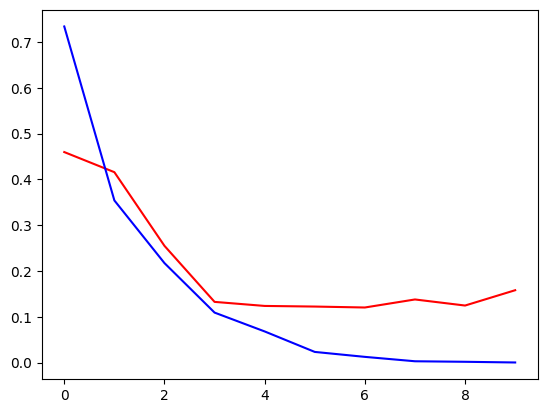

In [59]:
plt.plot(history.history['val_loss'], color="red")
plt.plot(history.history['loss'], color="blue")

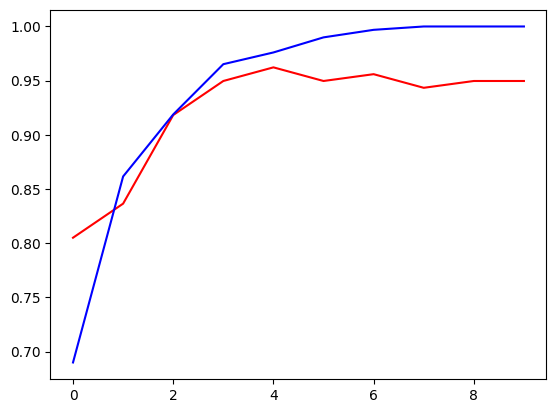

In [60]:
plt.plot(history.history['val_accuracy'], color="red")
plt.plot(history.history['accuracy'], color="blue")

In [61]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/memes_dataset/test',
    labels='inferred',
    label_mode='int',
    batch_size=1,
    image_size=(256,256)
)

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_ds = test_ds.map(process)

predictions = model.predict(test_ds)

Found 159 files belonging to 2 classes.
159/159 [==============================] - 2s 9ms/step


In [62]:
img = keras.preprocessing.image.load_img('/content/download.jpg')
img = tf.image.resize(img, (256, 256))
img = keras.preprocessing.image.img_to_array(img)
img = tf.expand_dims(img, axis=0)
img = tf.cast(img/255. ,tf.float32)

predictions = model.predict(img)
if predictions[0] < 0.5:
  print("Image is a meme")
else:
  print("Image is not a meme")


1/1 [==============================] - 0s 77ms/step
Image is not a meme


In [63]:
model.save('/content/CNN-meme-not-meme.keras')